In [1]:
!pip install kaggle

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kmader/skin-cancer-mnist-ham10000")

print("Path to dataset files:", path)

100%|██████████| 5.20G/5.20G [01:01<00:00, 90.3MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/kmader/skin-cancer-mnist-ham10000/versions/2


In [3]:
import pandas as pd

# Load the metadata file
metadata_path = "/root/.cache/kagglehub/datasets/kmader/skin-cancer-mnist-ham10000/versions/2/HAM10000_metadata.csv"
metadata_df = pd.read_csv(metadata_path)

# Preview the data
print(metadata_df.head())


     lesion_id      image_id   dx dx_type   age   sex localization
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear


In [4]:
import os

# Define the paths to the two folders
folder1 = "/root/.cache/kagglehub/datasets/kmader/skin-cancer-mnist-ham10000/versions/2/HAM10000_images_part_1"
folder2 = "/root/.cache/kagglehub/datasets/kmader/skin-cancer-mnist-ham10000/versions/2/HAM10000_images_part_2"

# Function to determine the full path of an image
def get_image_path(image_id):
    if os.path.exists(os.path.join(folder1, f"{image_id}.jpg")):
        return os.path.join(folder1, f"{image_id}.jpg")
    elif os.path.exists(os.path.join(folder2, f"{image_id}.jpg")):
        return os.path.join(folder2, f"{image_id}.jpg")
    else:
        return None

# Add the full image path to the metadata DataFrame
metadata_df['image_path'] = metadata_df['image_id'].apply(get_image_path)

# Verify
print(metadata_df[['image_id', 'image_path']].head())


       image_id                                         image_path
0  ISIC_0027419  /root/.cache/kagglehub/datasets/kmader/skin-ca...
1  ISIC_0025030  /root/.cache/kagglehub/datasets/kmader/skin-ca...
2  ISIC_0026769  /root/.cache/kagglehub/datasets/kmader/skin-ca...
3  ISIC_0025661  /root/.cache/kagglehub/datasets/kmader/skin-ca...
4  ISIC_0031633  /root/.cache/kagglehub/datasets/kmader/skin-ca...


In [5]:
from sklearn.model_selection import train_test_split

# Step 1: Split into train+validation and test sets
train_val_df, test_df = train_test_split(
    metadata_df,
    test_size=0.2,  # 20% of the data for the test set
    stratify=metadata_df['dx'],  # Maintain class distribution
    random_state=42
)

# Step 2: Split train+validation into train and validation sets
train_df, val_df = train_test_split(
    train_val_df,
    test_size=0.2,  # 20% of train+val set for validation (16% of total data)
    stratify=train_val_df['dx'],  # Maintain class distribution
    random_state=42
)

# Verify the splits
print(f"Training samples: {len(train_df)}")
print(f"Validation samples: {len(val_df)}")
print(f"Testing samples: {len(test_df)}")


Training samples: 6409
Validation samples: 1603
Testing samples: 2003


In [6]:
print(metadata_df[['image_id', 'image_path']].head())


       image_id                                         image_path
0  ISIC_0027419  /root/.cache/kagglehub/datasets/kmader/skin-ca...
1  ISIC_0025030  /root/.cache/kagglehub/datasets/kmader/skin-ca...
2  ISIC_0026769  /root/.cache/kagglehub/datasets/kmader/skin-ca...
3  ISIC_0025661  /root/.cache/kagglehub/datasets/kmader/skin-ca...
4  ISIC_0031633  /root/.cache/kagglehub/datasets/kmader/skin-ca...


In [7]:
print(train_df.columns)
print(test_df.columns)
print(val_df.columns)


Index(['lesion_id', 'image_id', 'dx', 'dx_type', 'age', 'sex', 'localization',
       'image_path'],
      dtype='object')
Index(['lesion_id', 'image_id', 'dx', 'dx_type', 'age', 'sex', 'localization',
       'image_path'],
      dtype='object')
Index(['lesion_id', 'image_id', 'dx', 'dx_type', 'age', 'sex', 'localization',
       'image_path'],
      dtype='object')


In [8]:
import os
from PIL import Image

# Paths to the image folders
folder1 = "/root/.cache/kagglehub/datasets/kmader/skin-cancer-mnist-ham10000/versions/2/HAM10000_images_part_1"
folder2 = "/root/.cache/kagglehub/datasets/kmader/skin-cancer-mnist-ham10000/versions/2/HAM10000_images_part_2"

# Output directories for resized images
train_output = "/content/resized_train_images"
val_output = "/content/resized_val_images"
test_output = "/content/resized_test_images"

# Ensure output directories exist
os.makedirs(train_output, exist_ok=True)
os.makedirs(val_output, exist_ok=True)
os.makedirs(test_output, exist_ok=True)

# Resize function
def resize_and_save(image_path, output_folder, size=(224, 224)):
    try:
        image = Image.open(image_path)
        image = image.resize(size)
        image.save(os.path.join(output_folder, os.path.basename(image_path)))
    except Exception as e:
        print(f"Error resizing {image_path}: {e}")

# Resize images for each dataset split
def process_split(dataframe, output_folder):
    for _, row in dataframe.iterrows():
        resize_and_save(row['image_path'], output_folder)

# Resize train and test images
process_split(train_df, train_output)
process_split(val_df, val_output)
process_split(test_df, test_output)

print("Resizing completed.")


Resizing completed.


In [9]:
import os

print(f"Training images: {len(os.listdir(train_output))}")
print(f"Test images: {len(os.listdir(test_output))}")
print(f"Validation images: {len(os.listdir(val_output))}")


Training images: 6409
Test images: 2003
Validation images: 1603


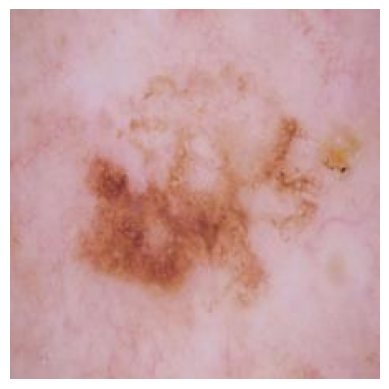

In [10]:
import matplotlib.pyplot as plt
import os
from PIL import Image

# Define the output folder path
output_folder = "/content/resized_train_images"

# List the images in the folder
image_files = os.listdir(output_folder)

# Select the first image (or any other image)
image_path = os.path.join(output_folder, image_files[0])

# Open and display the image using Matplotlib
image = Image.open(image_path)
plt.imshow(image)
plt.axis('off')  # Turn off axis
plt.show()


In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Columns to use from the metadata
tabular_features = ['age', 'sex', 'localization']

# Preprocessing: one-hot encode categorical features and scale numerical ones
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age']),
        ('cat', OneHotEncoder(), ['sex', 'localization'])
    ]
)

# Apply the preprocessing
train_tabular = preprocessor.fit_transform(train_df[tabular_features])
val_tabular = preprocessor.transform(val_df[tabular_features])
test_tabular = preprocessor.transform(test_df[tabular_features])

# Convert to PyTorch tensors
import torch
train_tabular = torch.tensor(train_tabular.toarray(), dtype=torch.float32)
val_tabular = torch.tensor(val_tabular.toarray(), dtype=torch.float32)
test_tabular = torch.tensor(test_tabular.toarray(), dtype=torch.float32)


In [12]:
from torchvision.models.resnet import ResNet, BasicBlock

class ResNet10(ResNet):
    def __init__(self, num_classes=1000):
        super(ResNet10, self).__init__(BasicBlock, [1, 1, 1, 1])  # 1 block per stage
        self.fc = nn.Linear(512, num_classes)

In [13]:
import torch.nn as nn
import torchvision.models as models
from torchvision.models.resnet import BasicBlock



class MultimodalModel(nn.Module):
    def __init__(self, num_tabular_features, num_classes):
        super(MultimodalModel, self).__init__()

        # Image branch (pre-trained ResNet)
        self.cnn = ResNet10(num_classes=512)
        self.cnn.fc = nn.Identity()  # Remove the ResNet final classification layer

        # Tabular branch
        self.tabular = nn.Sequential( #kasuta efficientNeti
            nn.Linear(num_tabular_features, 128),
            nn.ReLU(),
            nn.Dropout(p=0.5),  # Dropout
            nn.Linear(128, 64),
            nn.ReLU()
        )

        # Fusion layer
        self.fusion = nn.Sequential(
            nn.Linear(64 + 512, 128),  # 512 from ResNet output, 64 from tabular branch
            nn.ReLU(),
            nn.Dropout(p=0.5),  # Dropout
            nn.Linear(128, num_classes)
        )

    def forward(self, image, tabular_features):
        # Image features
        image_features = self.cnn(image)

        # Tabular features
        tabular_features = self.tabular(tabular_features)

        # Combine features
        combined = torch.cat((image_features, tabular_features), dim=1)

        # Final classification
        output = self.fusion(combined)
        return output


In [14]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image

class MultimodalDataset(Dataset):
    def __init__(self, dataframe, tabular_data, transform=None):
        self.dataframe = dataframe
        self.tabular_data = tabular_data
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        row = self.dataframe.iloc[idx]

        # Load and preprocess image
        image = Image.open(row['image_path']).convert('RGB')
        if self.transform:
            image = self.transform(image)

        # Load tabular features
        tabular_features = self.tabular_data[idx]

        # Get label
        label = row['label']

        return image, tabular_features, label

# Transformations for images
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Create datasets
train_dataset = MultimodalDataset(train_df, train_tabular, transform=transform)
val_dataset = MultimodalDataset(val_df, val_tabular, transform=transform)
test_dataset = MultimodalDataset(test_df, test_tabular, transform=transform)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)



In [15]:
# Create a mapping of disease labels to integers
label_map = {label: idx for idx, label in enumerate(metadata_df['dx'].unique())}

# Map the labels in train, validation, and test DataFrames
train_df['label'] = train_df['dx'].map(label_map)
val_df['label'] = val_df['dx'].map(label_map)
test_df['label'] = test_df['dx'].map(label_map)

# Verify the mapping
print("Label Map:", label_map)


Label Map: {'bkl': 0, 'nv': 1, 'df': 2, 'mel': 3, 'vasc': 4, 'bcc': 5, 'akiec': 6}


In [16]:

def replace_nan_with_median(tensor):

    for col in range(tensor.shape[1]):
        # Get non-NaN values in the column
        non_nan_values = tensor[:, col][~torch.isnan(tensor[:, col])]

        # Calculate the median, ignoring NaN
        median_value = torch.median(non_nan_values)

        # Replace NaN values with the median
        tensor[:, col][torch.isnan(tensor[:, col])] = median_value
    return tensor


In [17]:
import numpy as np

train_tabular = replace_nan_with_median(train_tabular)
val_tabular = replace_nan_with_median(val_tabular)
test_tabular = replace_nan_with_median(test_tabular)

In [18]:
class FocalLoss(nn.Module):
    def __init__(self, alpha=1, gamma=2):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma

    def forward(self, inputs, targets):
        ce_loss = nn.CrossEntropyLoss()(inputs, targets)
        pt = torch.exp(-ce_loss)
        focal_loss = self.alpha * (1 - pt) ** self.gamma * ce_loss
        return focal_loss

In [19]:
import torch
from sklearn.metrics import classification_report
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
from tqdm import tqdm


# Define device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize model, loss, optimizer
num_tabular_features = train_tabular.shape[1]
num_classes = len(label_map)
model = MultimodalModel(num_tabular_features, num_classes).to(device)

#criterion = nn.CrossEntropyLoss()
criterion = FocalLoss(alpha=1, gamma=2)
optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=0.01)

scheduler = StepLR(optimizer, step_size=5, gamma=0.1)  # Reduce LR every 5 epochs by 10%

# Training parameters
epochs = 20
best_val_loss = float('inf')
best_val_accuracy = 0.0
best_model_path = "best_multimodal_model.pth"

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Training Loop
for epoch in range(epochs):
    model.train()
    train_loss = 0.0
    correct_train = 0
    total_train = 0

    for images, tabular_features, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}"):
        images, tabular_features, labels = images.to(device), tabular_features.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images, tabular_features)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_accuracy = correct_train / total_train
    train_loss /= len(train_loader)

    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    # Validation Phase
    model.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for images, tabular_features, labels in val_loader:
            images, tabular_features, labels = images.to(device), tabular_features.to(device), labels.to(device)
            outputs = model(images, tabular_features)
            loss = criterion(outputs, labels)

            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_accuracy = correct_val / total_val
    val_loss /= len(val_loader)

    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    print(f"Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, "
          f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

    if val_accuracy > best_val_accuracy or (val_accuracy == best_val_accuracy and val_loss < best_val_loss):
        best_val_accuracy = val_accuracy
        best_val_loss = val_loss
        torch.save(model.state_dict(), best_model_path)
        print(f"New best model saved with Validation Accuracy: {val_accuracy:.4f}, Loss: {val_loss:.4f}")

    scheduler.step()

print("Training complete. Loading the best model.")
model.load_state_dict(torch.load(best_model_path))

# Evaluate on the test set
model.eval()
true_labels = []
predicted_labels = []



Epoch 1/20: 100%|██████████| 201/201 [01:19<00:00,  2.53it/s]


Epoch 1, Train Loss: 0.3441, Train Accuracy: 0.6867, Validation Loss: 0.2437, Validation Accuracy: 0.7311
New best model saved with Validation Accuracy: 0.7311, Loss: 0.2437


Epoch 2/20: 100%|██████████| 201/201 [01:17<00:00,  2.60it/s]


Epoch 2, Train Loss: 0.2639, Train Accuracy: 0.7138, Validation Loss: 0.2109, Validation Accuracy: 0.7380
New best model saved with Validation Accuracy: 0.7380, Loss: 0.2109


Epoch 3/20: 100%|██████████| 201/201 [01:16<00:00,  2.64it/s]


Epoch 3, Train Loss: 0.2381, Train Accuracy: 0.7195, Validation Loss: 0.1988, Validation Accuracy: 0.7399
New best model saved with Validation Accuracy: 0.7399, Loss: 0.1988


Epoch 4/20: 100%|██████████| 201/201 [01:17<00:00,  2.61it/s]


Epoch 4, Train Loss: 0.2172, Train Accuracy: 0.7266, Validation Loss: 0.1819, Validation Accuracy: 0.7455
New best model saved with Validation Accuracy: 0.7455, Loss: 0.1819


Epoch 5/20: 100%|██████████| 201/201 [01:17<00:00,  2.60it/s]


Epoch 5, Train Loss: 0.2080, Train Accuracy: 0.7294, Validation Loss: 0.1854, Validation Accuracy: 0.7461
New best model saved with Validation Accuracy: 0.7461, Loss: 0.1854


Epoch 6/20: 100%|██████████| 201/201 [01:17<00:00,  2.60it/s]


Epoch 6, Train Loss: 0.1768, Train Accuracy: 0.7436, Validation Loss: 0.1629, Validation Accuracy: 0.7617
New best model saved with Validation Accuracy: 0.7617, Loss: 0.1629


Epoch 7/20: 100%|██████████| 201/201 [01:16<00:00,  2.63it/s]


Epoch 7, Train Loss: 0.1726, Train Accuracy: 0.7500, Validation Loss: 0.1566, Validation Accuracy: 0.7686
New best model saved with Validation Accuracy: 0.7686, Loss: 0.1566


Epoch 8/20: 100%|██████████| 201/201 [01:16<00:00,  2.62it/s]


Epoch 8, Train Loss: 0.1637, Train Accuracy: 0.7518, Validation Loss: 0.1560, Validation Accuracy: 0.7598


Epoch 9/20: 100%|██████████| 201/201 [01:17<00:00,  2.59it/s]


Epoch 9, Train Loss: 0.1594, Train Accuracy: 0.7514, Validation Loss: 0.1525, Validation Accuracy: 0.7673


Epoch 10/20: 100%|██████████| 201/201 [01:17<00:00,  2.60it/s]


Epoch 10, Train Loss: 0.1574, Train Accuracy: 0.7560, Validation Loss: 0.1475, Validation Accuracy: 0.7698
New best model saved with Validation Accuracy: 0.7698, Loss: 0.1475


Epoch 11/20: 100%|██████████| 201/201 [01:17<00:00,  2.61it/s]


Epoch 11, Train Loss: 0.1504, Train Accuracy: 0.7582, Validation Loss: 0.1462, Validation Accuracy: 0.7717
New best model saved with Validation Accuracy: 0.7717, Loss: 0.1462


Epoch 12/20: 100%|██████████| 201/201 [01:16<00:00,  2.62it/s]


Epoch 12, Train Loss: 0.1514, Train Accuracy: 0.7628, Validation Loss: 0.1459, Validation Accuracy: 0.7742
New best model saved with Validation Accuracy: 0.7742, Loss: 0.1459


Epoch 13/20: 100%|██████████| 201/201 [01:18<00:00,  2.57it/s]


Epoch 13, Train Loss: 0.1512, Train Accuracy: 0.7567, Validation Loss: 0.1466, Validation Accuracy: 0.7686


Epoch 14/20: 100%|██████████| 201/201 [01:18<00:00,  2.56it/s]


Epoch 14, Train Loss: 0.1477, Train Accuracy: 0.7613, Validation Loss: 0.1445, Validation Accuracy: 0.7748
New best model saved with Validation Accuracy: 0.7748, Loss: 0.1445


Epoch 15/20: 100%|██████████| 201/201 [01:18<00:00,  2.58it/s]


Epoch 15, Train Loss: 0.1481, Train Accuracy: 0.7610, Validation Loss: 0.1445, Validation Accuracy: 0.7711


Epoch 16/20: 100%|██████████| 201/201 [01:17<00:00,  2.59it/s]


Epoch 16, Train Loss: 0.1537, Train Accuracy: 0.7642, Validation Loss: 0.1435, Validation Accuracy: 0.7735


Epoch 17/20: 100%|██████████| 201/201 [01:16<00:00,  2.63it/s]


Epoch 17, Train Loss: 0.1478, Train Accuracy: 0.7641, Validation Loss: 0.1443, Validation Accuracy: 0.7711


Epoch 18/20: 100%|██████████| 201/201 [01:16<00:00,  2.62it/s]


Epoch 18, Train Loss: 0.1488, Train Accuracy: 0.7605, Validation Loss: 0.1441, Validation Accuracy: 0.7704


Epoch 19/20: 100%|██████████| 201/201 [01:17<00:00,  2.59it/s]


Epoch 19, Train Loss: 0.1435, Train Accuracy: 0.7628, Validation Loss: 0.1431, Validation Accuracy: 0.7742


Epoch 20/20: 100%|██████████| 201/201 [01:17<00:00,  2.61it/s]


Epoch 20, Train Loss: 0.1505, Train Accuracy: 0.7589, Validation Loss: 0.1453, Validation Accuracy: 0.7692
Training complete. Loading the best model.


<ipython-input-19-6b4efe6a7005>:95: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_model_path))


In [20]:
# Switch to evaluation mode
model.eval()

# Load the best model
model.load_state_dict(torch.load("best_multimodal_model.pth"))

# Initialize metrics
test_loss = 0.0
correct_test = 0
total_test = 0

# Disable gradient calculations for testing
with torch.no_grad():
    for images, tabular_features, labels in test_loader:
        images, tabular_features, labels = images.to(device), tabular_features.to(device), labels.to(device)
        outputs = model(images, tabular_features)
        loss = criterion(outputs, labels)

        test_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()

# Compute metrics
test_accuracy = correct_test / total_test
test_loss /= len(test_loader)

print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


<ipython-input-20-68b16f60a258>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_multimodal_model.pth"))


Test Loss: 0.1563, Test Accuracy: 0.7599


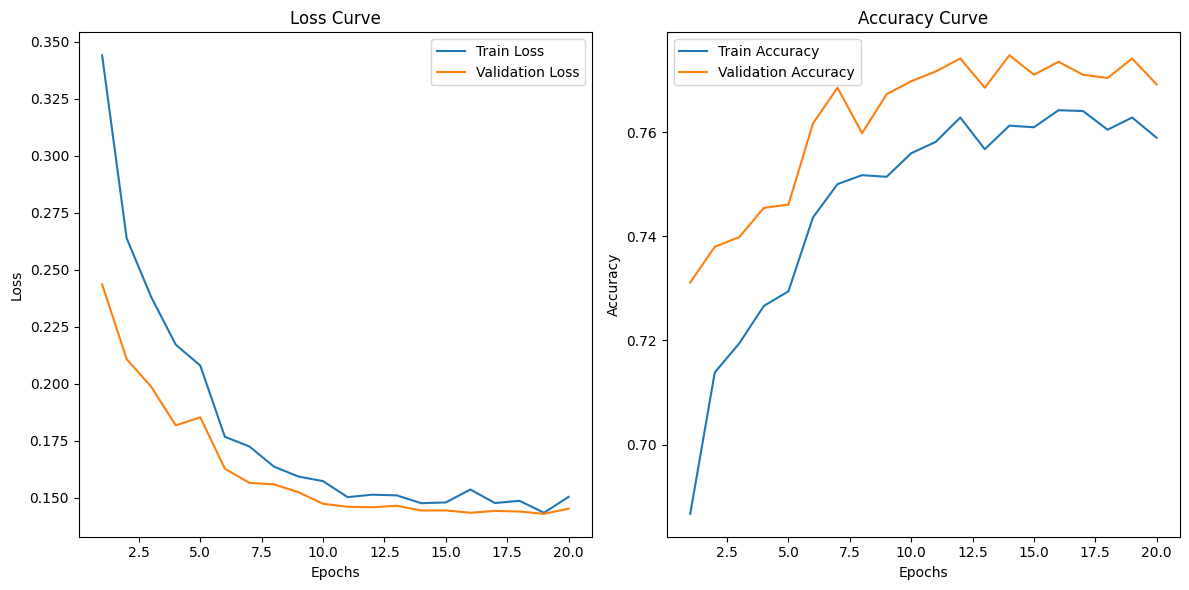

In [21]:
plt.figure(figsize=(12, 6))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), train_losses, label="Train Loss")
plt.plot(range(1, epochs + 1), val_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), train_accuracies, label="Train Accuracy")
plt.plot(range(1, epochs + 1), val_accuracies, label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Curve")
plt.legend()

plt.tight_layout()
plt.show()